In [1]:
# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2023-04-06 17:10:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-04-06 17:10:50 (6.71 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

In [5]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


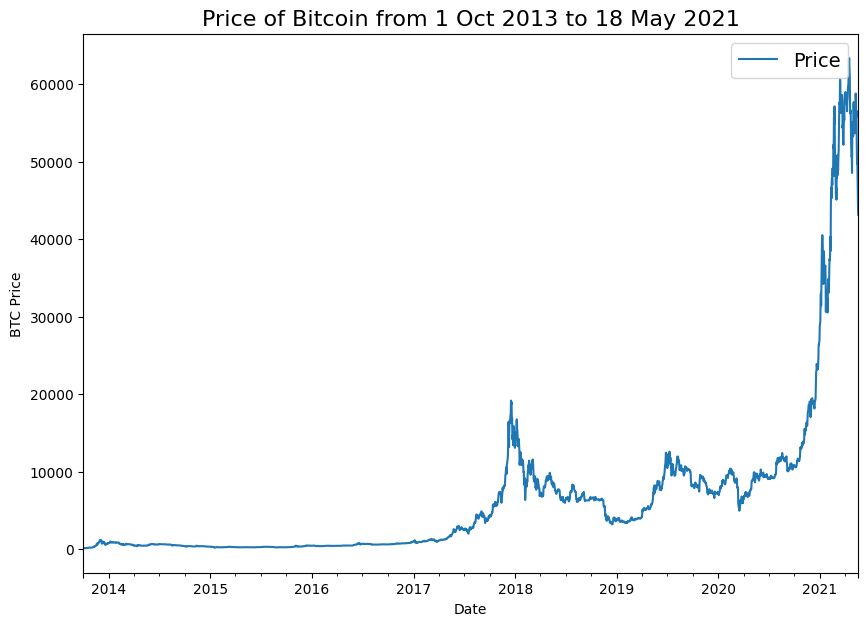

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [7]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

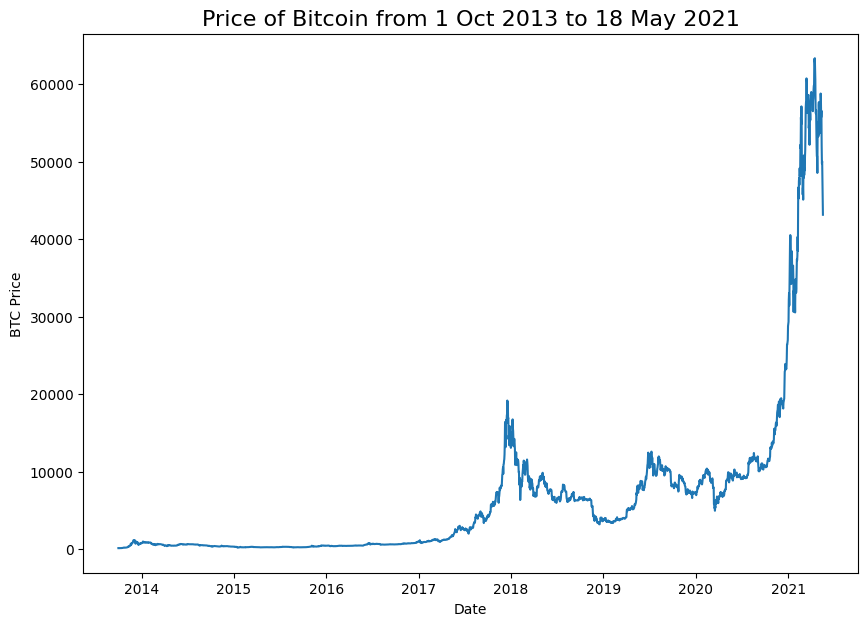

In [8]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [ ]:
# Create train & test sets for time series (the wrong way)

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2229,), (558,), (2229,), (558,))

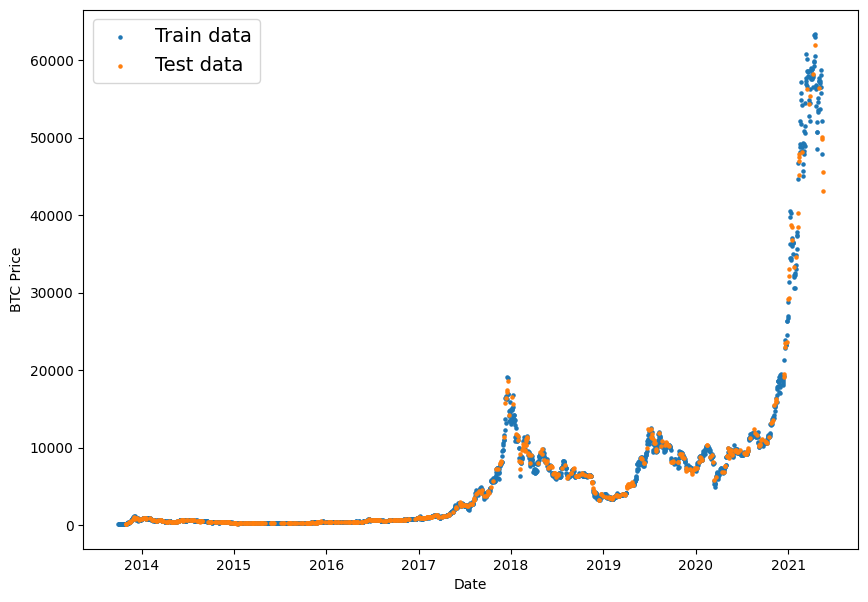

In [11]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

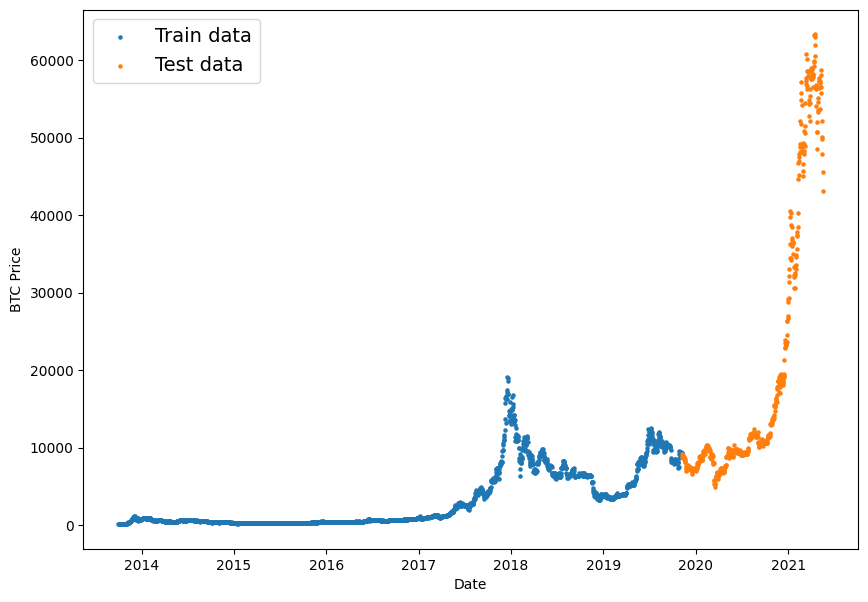

In [13]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

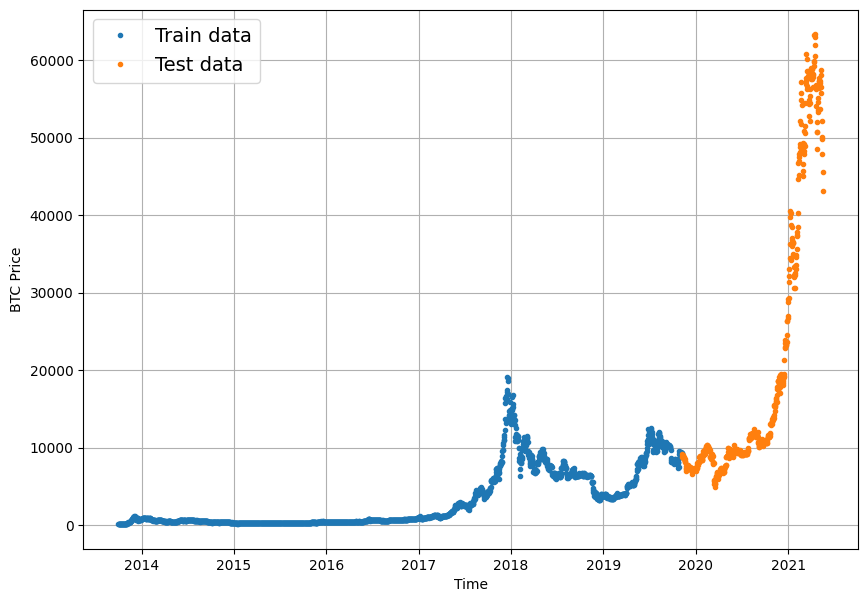

In [15]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
# Model 0: Naïve forecast (baseline)

In [16]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

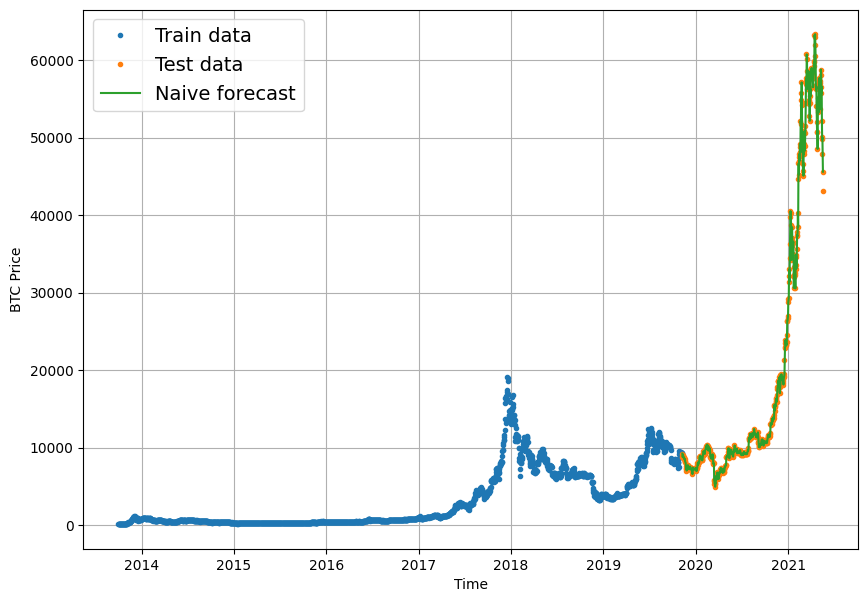

In [17]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

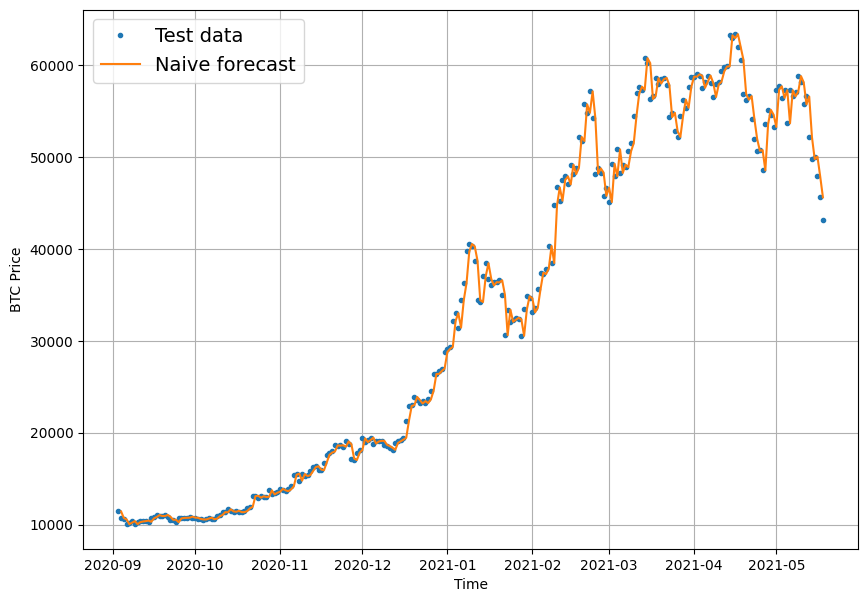

In [18]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [19]:
# Let's get TensorFlow! 
import tensorflow as tf

In [20]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [21]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [22]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [23]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737226

In [ ]:
# Format Data Part 2: Windowing dataset

In [24]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [25]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [27]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [28]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [30]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [31]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [32]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [35]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [ ]:
# Model 1: Dense model (window = 7, horizon = 1)

In [36]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
 1/18 [>.............................] - ETA: 14s - loss: 2960.9487 - mae: 2960.9487

18/18 [==============================] - 2s 58ms/step - loss: 1101.9753 - mae: 1101.9753 - val_loss: 2830.2949 - val_mae: 2830.2949
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 422.1008 - mae: 422.1008

18/18 [==============================] - 1s 41ms/step - loss: 294.3004 - mae: 294.3004 - val_loss: 1117.6846 - val_mae: 1117.6846
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 213.5068 - mae: 213.5068 - val_loss: 1122.3456 - val_mae: 1122.3456
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 250.0381 - mae: 250.0381

18/18 [==============================] - 1s 38ms/step - loss: 200.4140 - mae: 200.4140 - val_loss: 1062.3092 - val_mae: 1062.3092
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 204.6005 - mae: 204.6005

18/18 [==============================] - 1s 38ms/step - loss: 189.3696 - mae: 189.3696 - val_loss: 1055.9672 - val_mae: 1055.9672
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 138.8125 - mae: 138.8125

18/18 [==============================] - 1s 57ms/step - loss: 183.0212 - mae: 183.0212 - val_loss: 988.7648 - val_mae: 988.7648
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 221.0192 - mae: 221.0192

18/18 [==============================] - 1s 37ms/step - loss: 175.6849 - mae: 175.6849 - val_loss: 979.3521 - val_mae: 979.3521
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 149.4069 - mae: 149.4069

18/18 [==============================] - 1s 36ms/step - loss: 170.8917 - mae: 170.8917 - val_loss: 940.0811 - val_mae: 940.0811
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 171.2405 - mae: 171.2405 - val_loss: 950.0144 - val_mae: 950.0144
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 178.8636 - mae: 178.8636

18/18 [==============================] - 1s 36ms/step - loss: 167.3936 - mae: 167.3936 - val_loss: 922.4307 - val_mae: 922.4307
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 167.6515 - mae: 167.6515

18/18 [==============================] - 1s 52ms/step - loss: 161.6035 - mae: 161.6035 - val_loss: 885.2612 - val_mae: 885.2612
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 155.9663 - mae: 155.9663 - val_loss: 902.1083 - val_mae: 902.1083
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 156.3274 - mae: 156.3274 - val_loss: 964.0344 - val_mae: 964.0344
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 171.0636 - mae: 171.0636

18/18 [==============================] - 1s 53ms/step - loss: 152.1375 - mae: 152.1375 - val_loss: 871.3181 - val_mae: 871.3181
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 159.7552 - mae: 159.7552

18/18 [==============================] - 1s 50ms/step - loss: 149.9832 - mae: 149.9832 - val_loss: 821.4930 - val_mae: 821.4930
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 129.1377 - mae: 129.1377

18/18 [==============================] - 1s 38ms/step - loss: 143.7412 - mae: 143.7412 - val_loss: 819.1162 - val_mae: 819.1162
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 140.5786 - mae: 140.5786 - val_loss: 866.1233 - val_mae: 866.1234
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 163.7770 - mae: 163.7770

18/18 [==============================] - 1s 35ms/step - loss: 141.6390 - mae: 141.6390 - val_loss: 778.0445 - val_mae: 778.0445
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 135.6868 - mae: 135.6868 - val_loss: 784.3557 - val_mae: 784.3557
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 150.4155 - mae: 150.4155

18/18 [==============================] - 1s 38ms/step - loss: 133.9549 - mae: 133.9549 - val_loss: 739.5464 - val_mae: 739.5464
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 149.0210 - mae: 149.0210

18/18 [==============================] - 1s 37ms/step - loss: 137.1794 - mae: 137.1794 - val_loss: 737.6540 - val_mae: 737.6540
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 130.8939 - mae: 130.8939 - val_loss: 740.2581 - val_mae: 740.2581
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 133.8154 - mae: 133.8154

18/18 [==============================] - 1s 37ms/step - loss: 131.9658 - mae: 131.9658 - val_loss: 697.4493 - val_mae: 697.4493
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 141.9621 - mae: 141.9621

18/18 [==============================] - 1s 36ms/step - loss: 128.1199 - mae: 128.1199 - val_loss: 686.5974 - val_mae: 686.5974
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 138.8217 - mae: 138.8217

18/18 [==============================] - 1s 83ms/step - loss: 127.6276 - mae: 127.6276 - val_loss: 679.6496 - val_mae: 679.6496
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 125.6395 - mae: 125.6395

18/18 [==============================] - 1s 67ms/step - loss: 125.9190 - mae: 125.9190 - val_loss: 672.5618 - val_mae: 672.5618
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 124.5778 - mae: 124.5778 - val_loss: 690.1064 - val_mae: 690.1064
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 129.1884 - mae: 129.1884 - val_loss: 724.8602 - val_mae: 724.8602
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 126.4501 - mae: 126.4501 - val_loss: 683.2610 - val_mae: 683.2610
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 142.8969 - mae: 142.8969

18/18 [==============================] - 1s 72ms/step - loss: 129.4342 - mae: 129.4342 - val_loss: 648.9393 - val_mae: 648.9393
Epoch 31/100
18/18 [==============================] - 0s 10ms/step - loss: 120.2647 - mae: 120.2647 - val_loss: 650.9478 - val_mae: 650.9478
Epoch 32/100
13/18 [====================>.........] - ETA: 0s - loss: 121.8891 - mae: 121.8891

18/18 [==============================] - 2s 134ms/step - loss: 120.1740 - mae: 120.1740 - val_loss: 641.6955 - val_mae: 641.6955
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 121.7446 - mae: 121.7446 - val_loss: 758.5380 - val_mae: 758.5380
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 125.8176 - mae: 125.8176 - val_loss: 675.3043 - val_mae: 675.3043
Epoch 35/100
16/18 [=========================>....] - ETA: 0s - loss: 121.9102 - mae: 121.9102

18/18 [==============================] - 1s 57ms/step - loss: 121.6673 - mae: 121.6673 - val_loss: 636.3095 - val_mae: 636.3095
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 157.9103 - mae: 157.9103

18/18 [==============================] - 1s 54ms/step - loss: 123.6934 - mae: 123.6934 - val_loss: 626.0754 - val_mae: 626.0754
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 118.5152 - mae: 118.5152 - val_loss: 645.2825 - val_mae: 645.2825
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 102.9179 - mae: 102.9179

18/18 [==============================] - 1s 37ms/step - loss: 117.4641 - mae: 117.4641 - val_loss: 621.0891 - val_mae: 621.0891
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 129.4607 - mae: 129.4607

18/18 [==============================] - 1s 36ms/step - loss: 116.9551 - mae: 116.9551 - val_loss: 616.8325 - val_mae: 616.8325
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2576 - mae: 116.2576 - val_loss: 638.1302 - val_mae: 638.1302
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 111.8051 - mae: 111.8051

18/18 [==============================] - 1s 35ms/step - loss: 115.8473 - mae: 115.8473 - val_loss: 613.1417 - val_mae: 613.1417
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 117.6346 - mae: 117.6346 - val_loss: 697.1404 - val_mae: 697.1404
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2906 - mae: 122.2906 - val_loss: 693.6970 - val_mae: 693.6970
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 120.3567 - mae: 120.3567

18/18 [==============================] - 1s 48ms/step - loss: 120.7541 - mae: 120.7541 - val_loss: 609.1405 - val_mae: 609.1405
Epoch 45/100
17/18 [===========================>..] - ETA: 0s - loss: 113.4470 - mae: 113.4470

18/18 [==============================] - 1s 84ms/step - loss: 113.1710 - mae: 113.1710 - val_loss: 601.8104 - val_mae: 601.8104
Epoch 46/100
18/18 [==============================] - 0s 9ms/step - loss: 114.8579 - mae: 114.8579 - val_loss: 618.4514 - val_mae: 618.4514
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 114.6572 - mae: 114.6572 - val_loss: 605.9103 - val_mae: 605.9103
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 112.6086 - mae: 112.6086 - val_loss: 603.1018 - val_mae: 603.1018
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 114.9652 - mae: 114.9652 - val_loss: 717.8621 - val_mae: 717.8621
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 125.0345 - mae: 125.0345 - val_loss: 619.8610 - val_mae: 619.8610
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 115.2347 - mae: 115.2347 - val_loss: 611.2201 - val_mae: 611.2201
Epoch 52/100
15/18 [============

18/18 [==============================] - 1s 61ms/step - loss: 115.2573 - mae: 115.2573 - val_loss: 588.5607 - val_mae: 588.5607
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2721 - mae: 115.2721 - val_loss: 651.4052 - val_mae: 651.4052
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 115.8171 - mae: 115.8171 - val_loss: 589.8265 - val_mae: 589.8265
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 123.3374 - mae: 123.3374 - val_loss: 593.9394 - val_mae: 593.9394
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7588 - mae: 115.7588 - val_loss: 845.7049 - val_mae: 845.7049
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 132.8539 - mae: 132.8539 - val_loss: 687.0654 - val_mae: 687.0654
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 120.0160 - mae: 120.0160 - val_loss: 647.1513 - val_mae: 647.1513
Epoch 59/100
18/18 [============

18/18 [==============================] - 1s 39ms/step - loss: 113.4777 - mae: 113.4777 - val_loss: 580.0253 - val_mae: 580.0253
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 73.5522 - mae: 73.5522

18/18 [==============================] - 1s 37ms/step - loss: 109.2565 - mae: 109.2565 - val_loss: 578.8861 - val_mae: 578.8861
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5027 - mae: 110.5027 - val_loss: 600.6772 - val_mae: 600.6772
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9061 - mae: 110.9061 - val_loss: 628.4286 - val_mae: 628.4286
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8016 - mae: 115.8016 - val_loss: 608.4224 - val_mae: 608.4224
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9964 - mae: 110.9964 - val_loss: 584.5357 - val_mae: 584.5357
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2421 - mae: 110.2421 - val_loss: 707.0279 - val_mae: 707.0279
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0211 - mae: 113.0211 - val_loss: 590.0016 - val_mae: 590.0016
Epoch 69/100
18/18 [============

18/18 [==============================] - 1s 40ms/step - loss: 112.2275 - mae: 112.2275 - val_loss: 577.7994 - val_mae: 577.7994
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 91.5111 - mae: 91.5111

18/18 [==============================] - 1s 53ms/step - loss: 112.6654 - mae: 112.6654 - val_loss: 573.3215 - val_mae: 573.3215
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 112.5960 - mae: 112.5960 - val_loss: 593.4489 - val_mae: 593.4489
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2039 - mae: 111.2039 - val_loss: 592.5799 - val_mae: 592.5799
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9025 - mae: 112.9025 - val_loss: 610.3864 - val_mae: 610.3864
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3804 - mae: 114.3804 - val_loss: 604.4553 - val_mae: 604.4553
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 88.4567 - mae: 88.4567

18/18 [==============================] - 1s 56ms/step - loss: 107.1747 - mae: 107.1747 - val_loss: 572.4368 - val_mae: 572.4368
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 111.0200 - mae: 111.0200 - val_loss: 636.6315 - val_mae: 636.6315
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 112.7921 - mae: 112.7921 - val_loss: 587.7431 - val_mae: 587.7431
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2961 - mae: 109.2961 - val_loss: 599.6983 - val_mae: 599.6983
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 107.6770 - mae: 107.6770 - val_loss: 591.7040 - val_mae: 591.7040
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 119.1582 - mae: 119.1582 - val_loss: 582.3996 - val_mae: 582.3996
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 118.6904 - mae: 118.6904 - val_loss: 664.8054 - val_mae: 664.8054
Epoch 84/100
18/18 [============

18/18 [==============================] - 1s 56ms/step - loss: 108.8087 - mae: 108.8087 - val_loss: 567.8793 - val_mae: 567.8793
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9887 - mae: 107.9887 - val_loss: 590.9123 - val_mae: 590.9123
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8982 - mae: 105.8982 - val_loss: 575.9820 - val_mae: 575.9820
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 85.9779 - mae: 85.9779

18/18 [==============================] - 1s 38ms/step - loss: 112.0638 - mae: 112.0638 - val_loss: 565.4476 - val_mae: 565.4476
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3250 - mae: 112.3250 - val_loss: 629.7430 - val_mae: 629.7430
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 122.7266 - mae: 122.7266 - val_loss: 624.6379 - val_mae: 624.6379
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 112.1078 - mae: 112.1078 - val_loss: 573.8214 - val_mae: 573.8214
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0151 - mae: 106.0151 - val_loss: 565.6346 - val_mae: 565.6346
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0733 - mae: 107.0733 - val_loss: 587.9705 - val_mae: 587.9705
Epoch 97/100
 1/18 [>.............................] - ETA: 0s - loss: 100.5399 - mae: 100.5399

18/18 [==============================] - 1s 36ms/step - loss: 107.5323 - mae: 107.5323 - val_loss: 565.2184 - val_mae: 565.2184
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7241 - mae: 106.7241 - val_loss: 572.0468 - val_mae: 572.0468
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 151.8762 - mae: 151.8762

18/18 [==============================] - 1s 36ms/step - loss: 107.9265 - mae: 107.9265 - val_loss: 564.6537 - val_mae: 564.6537
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 111.3749 - mae: 111.3749 - val_loss: 605.5363 - val_mae: 605.5363


In [37]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.5364 - mae: 605.5364


[605.536376953125, 605.536376953125]

In [38]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.6537 - mae: 564.6537


[564.6537475585938, 564.6537475585938]

In [39]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [40]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8856.763 , 8757.505 , 9012.255 , 8798.149 , 8736.052 , 8738.302 ,
        8674.723 , 8512.127 , 8458.871 , 8513.1455], dtype=float32)>)

In [41]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 564.6537,
 'mse': 1159703.2,
 'rmse': 1076.8951,
 'mape': 2.5232499,
 'mase': 0.99194014}

In [42]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

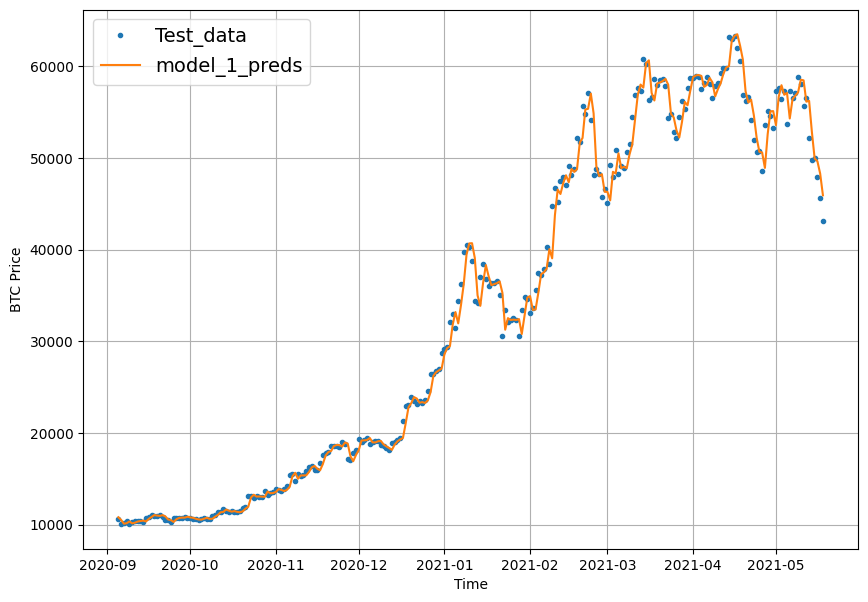

In [43]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [ ]:
# Model 2: Dense (window = 30, horizon = 1)

In [44]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [45]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [46]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [47]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [48]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 623.9058


623.90576171875

In [49]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 616.5021


616.5020751953125

In [50]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 5ms/step


In [51]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 616.50214,
 'mse': 1301179.2,
 'rmse': 1140.6924,
 'mape': 2.7869632,
 'mase': 1.0776517}

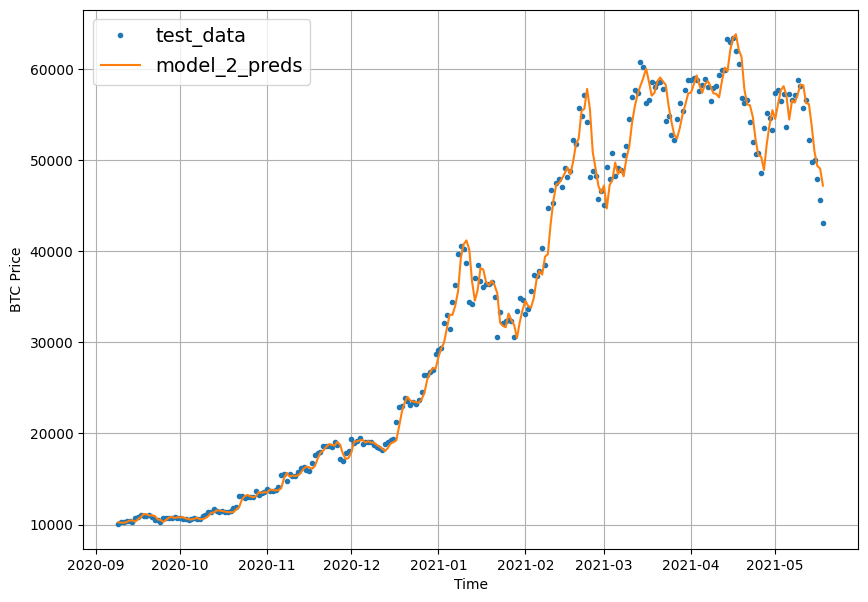

In [52]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

In [ ]:
# Model 3: Dense (window = 30, horizon = 7)

In [53]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [54]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [55]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [56]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1383.2336


1383.233642578125

In [57]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1241.9739


1241.973876953125

In [58]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9324.507, 9318.55 , 9407.758, 9625.35 , 9393.209, 9423.898,
        9438.904],
       [9029.818, 9037.986, 8942.548, 9350.62 , 9227.982, 9229.668,
        9339.447],
       [8707.016, 8775.638, 8790.216, 9121.525, 9070.248, 9140.163,
        9186.564],
       [8826.544, 8861.578, 9092.112, 9206.731, 9001.141, 9330.012,
        9140.349],
       [8841.703, 8983.019, 9199.368, 9091.203, 8818.854, 9285.309,
        9136.84 ]], dtype=float32)>

In [59]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  625.6673  ,   426.52582 ,   372.81473 ,   438.90067 ,
          496.55148 ,   439.26862 ,   518.8926  ,   481.08823 ,
          427.5888  ,   547.5544  ,   757.4113  ,   665.6014  ,
          735.4179  ,   781.7261  ,   551.15875 ,   263.97614 ,
          191.42027 ,   301.45258 ,   407.41977 ,   356.2857  ,
          154.14969 ,   148.27748 ,   239.07687 ,   270.48032 ,
          111.28383 ,   102.97782 ,   125.999794,   149.18156 ,
          143.5941  ,   209.33092 ,   284.5473  ,   333.1504  ,
          322.4387  ,   358.33383 ,   237.0618  ,   280.19434 ,
          328.512   ,   193.64377 ,   188.30727 ,   229.63393 ,
          507.34995 ,   158.96547 ,    99.22328 ,    78.715126,
           51.308735,   119.766464,    84.41985 ,    45.536343,
           90.52867 ,   134.13777 ,   122.51221 ,   125.75014 ,
          145.43129 ,   196.46506 ,   243.46346 ,   341.25363 ,
          537.9373  ,   585.5883  ,   424.25336 ,   577.9964  ,
          410.88217 ,   146.14355

In [60]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [61]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1241.9738,
 'mse': 5524432.0,
 'rmse': 1426.8698,
 'mape': 5.485606,
 'mase': 2.2100227}

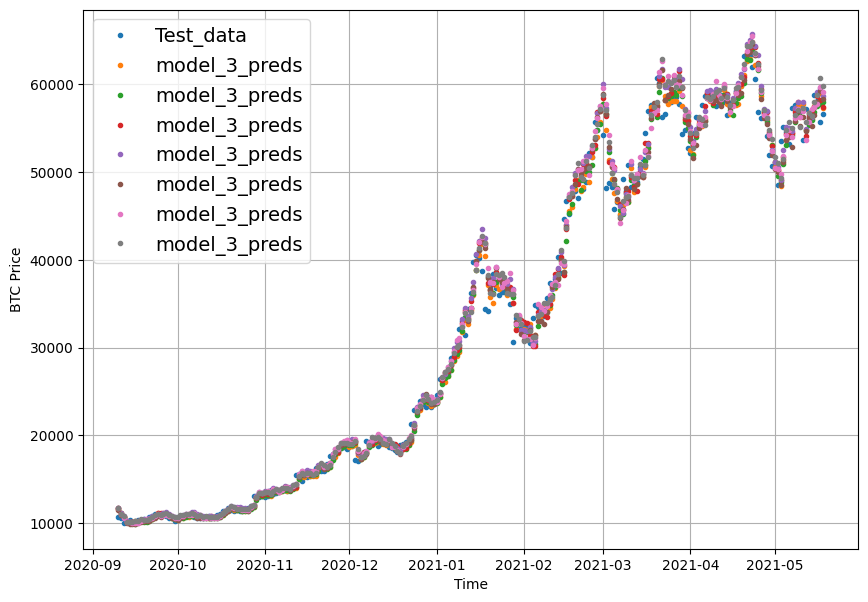

In [62]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

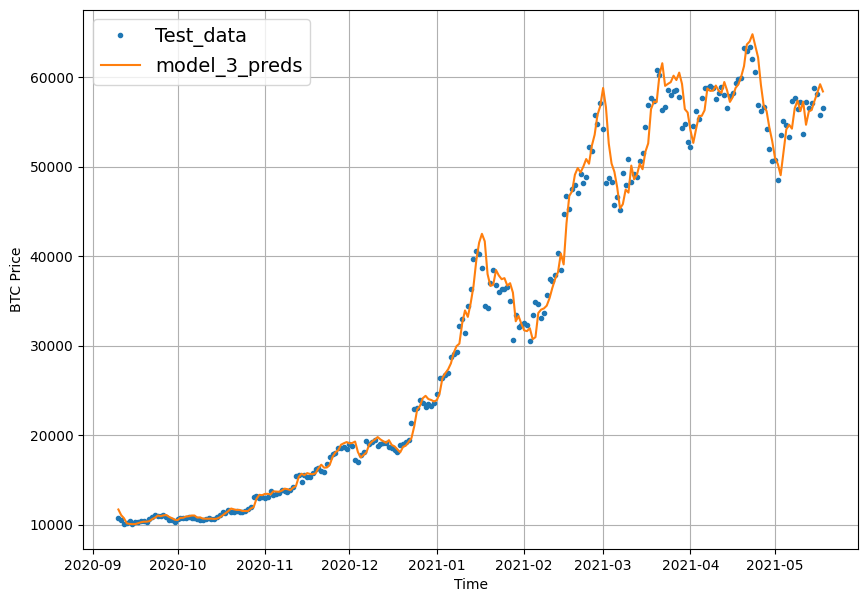

In [63]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

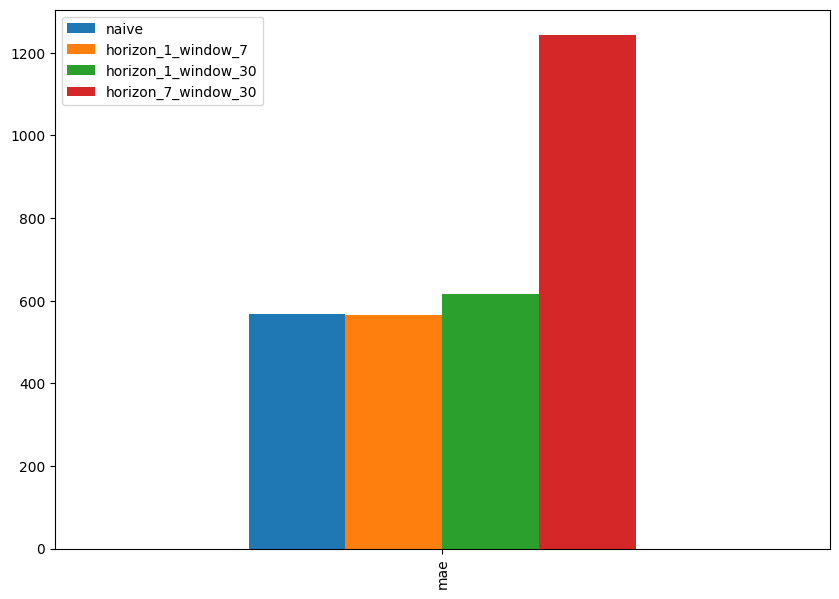

In [64]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [ ]:
# Model 4: Conv1D

In [68]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [69]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [70]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [71]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [72]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [73]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [74]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 567.7753


567.7753295898438

In [76]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8882.783, 8794.353, 8999.786, 8794.593, 8760.326, 8724.25 ,
       8676.052, 8553.152, 8454.396, 8520.259], dtype=float32)>

In [77]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 567.7753,
 'mse': 1174085.1,
 'rmse': 1083.5521,
 'mape': 2.5413244,
 'mase': 0.997424}

In [ ]:
# Model 5: RNN (LSTM)

In [78]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [79]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 595.0109


595.0109252929688

In [80]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8964.204, 8811.154, 8957.849, 8816.615, 8740.286, 8734.351,
       8705.796, 8557.538, 8470.126, 8512.356], dtype=float32)>

In [81]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 595.0108,
 'mse': 1267155.1,
 'rmse': 1125.6798,
 'mape': 2.683295,
 'mase': 1.0452691}

Make a multivariate time series

In [82]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [83]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [84]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [85]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


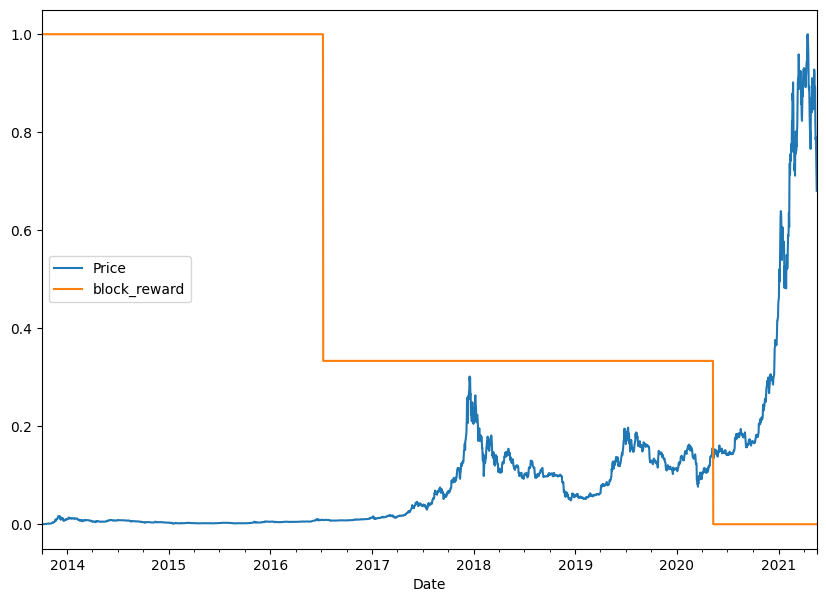

In [86]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [ ]:
# Making a windowed dataset with pandas

In [87]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [88]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [89]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [90]:
# View labels
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [91]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Model 6: Dense (multivariate time series)

In [97]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [98]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 566.2116


566.2116088867188

In [99]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.845, 8785.423, 9046.094, 8779.279, 8741.654, 8736.581,
       8693.716, 8509.632, 8466.897, 8529.538], dtype=float32)>

In [95]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 563.7871,
 'mse': 1157674.1,
 'rmse': 1075.9526,
 'mape': 2.5450969,
 'mase': 0.9904178}

In [96]:
model_1_results


{'mae': 564.6537,
 'mse': 1159703.2,
 'rmse': 1076.8951,
 'mape': 2.5232499,
 'mase': 0.99194014}

In [ ]:
# Model 7: N-BEATS algorithm

In [100]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [101]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [102]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [103]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.2860312   0.46420702 -0.60195684 -0.66619354  0.20846467 -0.07506615
 -1.1664673 ]
Forecast: 0.17098727822303772


In [104]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [105]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [106]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [107]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [108]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [109]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [110]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [111]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
# model_7.fit(train_dataset,
#             epochs=N_EPOCHS,
#             validation_data=test_dataset,
#             verbose=0, # prevent large amounts of training outputs
#             # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
#             callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
#                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

CPU times: user 2.7 s, sys: 123 ms, total: 2.82 s
Wall time: 2.79 s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

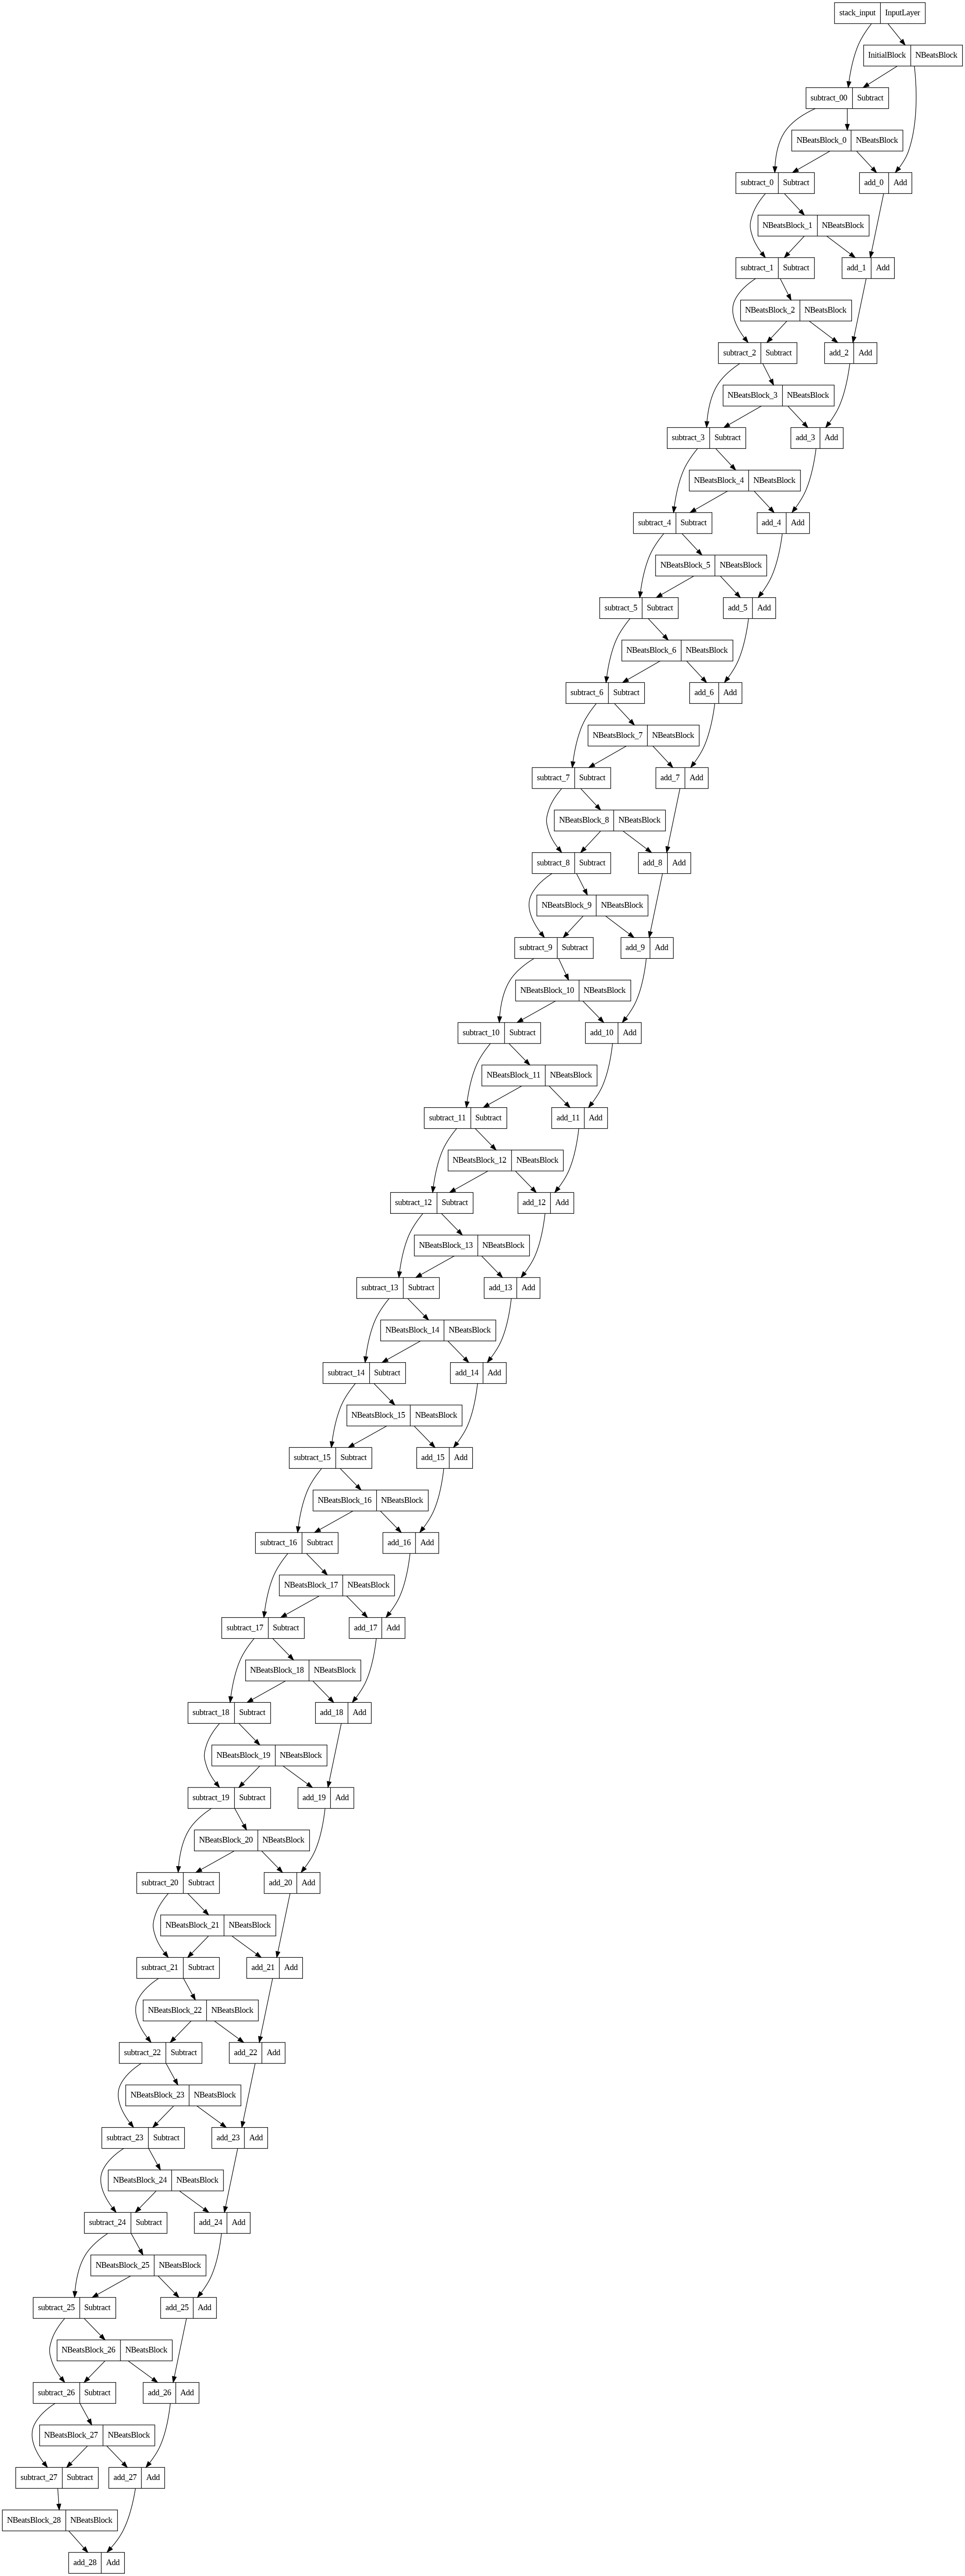

In [112]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [ ]:
# Model 8: Creating an ensemble (stacking different models together)

In [113]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [114]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 817: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 354: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 454: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 286: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 386: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 113: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 597: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 697: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 317: ReduceLROnPl

In [115]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [116]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 201ms/step


1/1 [==============================] - 0s 204ms/step


1/1 [==============================] - 0s 51ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8832.637,  8805.997,  8989.228, ..., 50366.223, 48492.137,
        46559.17 ],
       [ 8751.108,  8733.416,  9103.784, ..., 49376.652, 49048.824,
        46293.707],
       [ 8814.498,  8792.657,  9048.464, ..., 49767.24 , 48236.023,
        45916.777],
       ...,
       [ 8852.742,  8737.741,  9062.971, ..., 49821.234, 48652.28 ,
        47134.605],
       [ 8741.819,  8706.793,  9022.955, ..., 50094.42 , 48615.04 ,
        46307.387],
       [ 8807.077,  8813.41 ,  9097.341, ..., 50490.07 , 48821.496,
        46489.773]], dtype=float32)>

In [117]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 568.32544,
 'mse': 1146962.1,
 'rmse': 1070.9631,
 'mape': 2.5762794,
 'mase': 0.9983904}

In [118]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

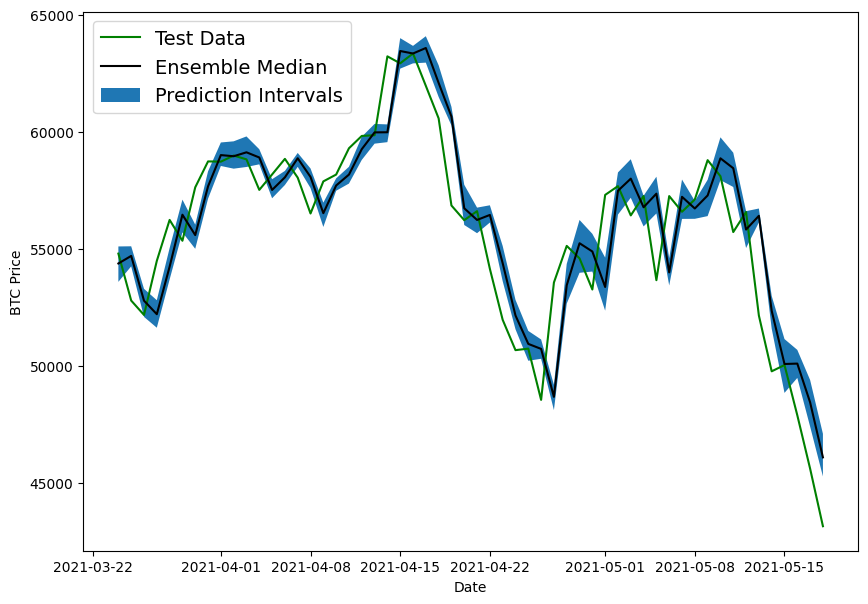

In [119]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

In [ ]:
# Model 9: Train a model on the full historical data to make predictions into future

In [120]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [121]:
# Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [122]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [123]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [124]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [125]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [126]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 64ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55446.88671875

1/1 [==============================] - 0s 42ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55446.88671875] -> Prediction: 51004.20703125

1/1 [==============================] - 0s 38ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55446.88671875 51004.20703125] -> Prediction: 47770.0625

1/1 [==============================] - 0s 42ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55446.88671875 51004.20703125 47770.0625    ] -> Prediction: 48918.36328125

1/1 [==============================] - 0s 44ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55446.88671875
 51004.20703125 47770.0625     48918.36328

In [128]:
future_forecast[:10]

[55446.887,
 51004.207,
 47770.062,
 48918.363,
 47288.027,
 46550.688,
 47356.76,
 53532.605,
 49345.043,
 46946.715]

In [127]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [129]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [130]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [131]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55446.887, 51004.207, 47770.062, 48918.363, 47288.027,
        46550.688, 47356.76 , 53532.605, 49345.043, 46946.715, 48556.195,
        47323.12 , 47737.46 , 49152.777], dtype=float32))

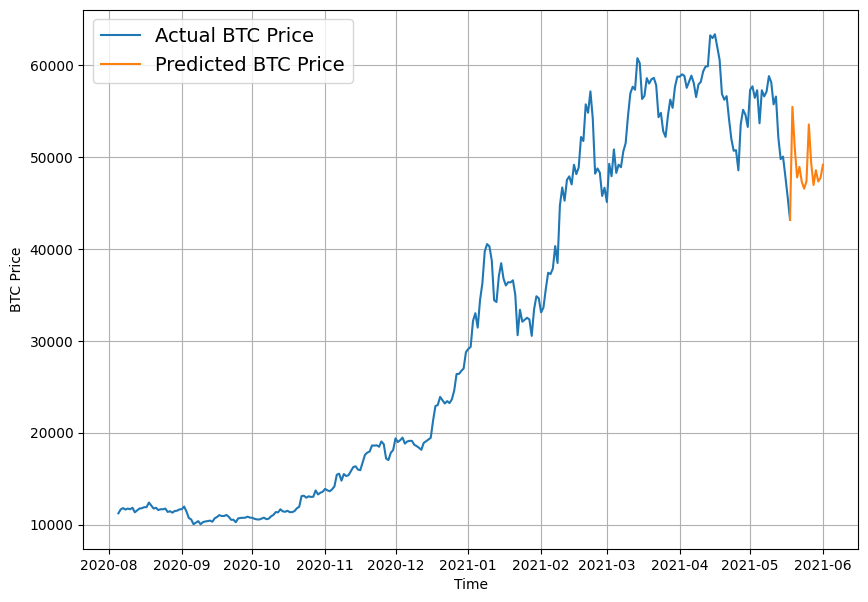

In [132]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [ ]:
# Model 10: Why forecasting is BS (the turkey problem 🦃)

In [133]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [134]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [135]:
# Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

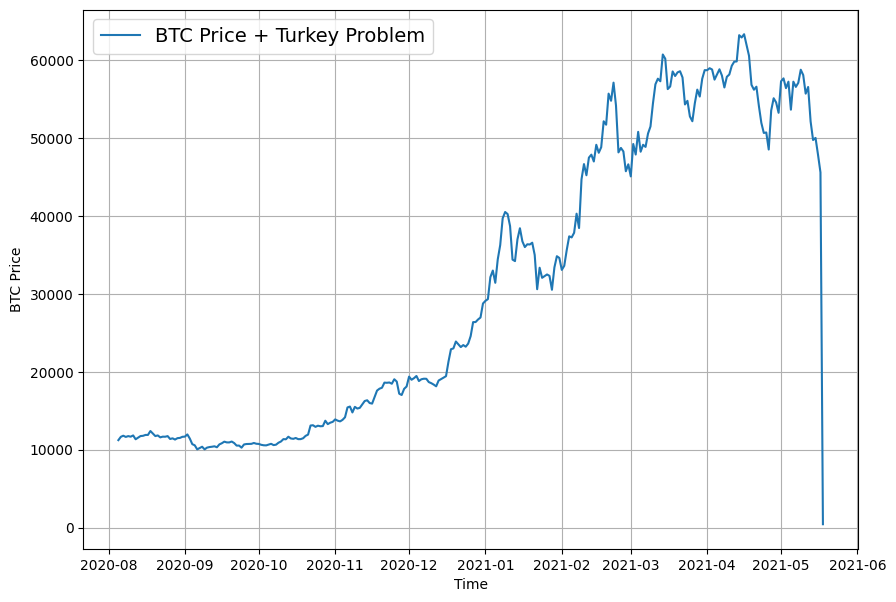

In [136]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey, 
                 values=btc_price_turkey, 
                 format="-", 
                 label="BTC Price + Turkey Problem", 
                 start=2500)

In [137]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [138]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [139]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 823.5128


823.5128173828125

In [140]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 636.9423


636.9422607421875

In [141]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8842.83 , 8794.458, 9034.801, 8772.763, 8783.187, 8739.846,
       8671.726, 8539.77 , 8465.976, 8530.793], dtype=float32)>

In [142]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17136.682,
 'mse': 614875500.0,
 'rmse': 23726.541,
 'mape': 121.464325,
 'mase': 26.519075}

In [143]:
model_1_results

{'mae': 564.6537,
 'mse': 1159703.2,
 'rmse': 1076.8951,
 'mape': 2.5232499,
 'mase': 0.99194014}

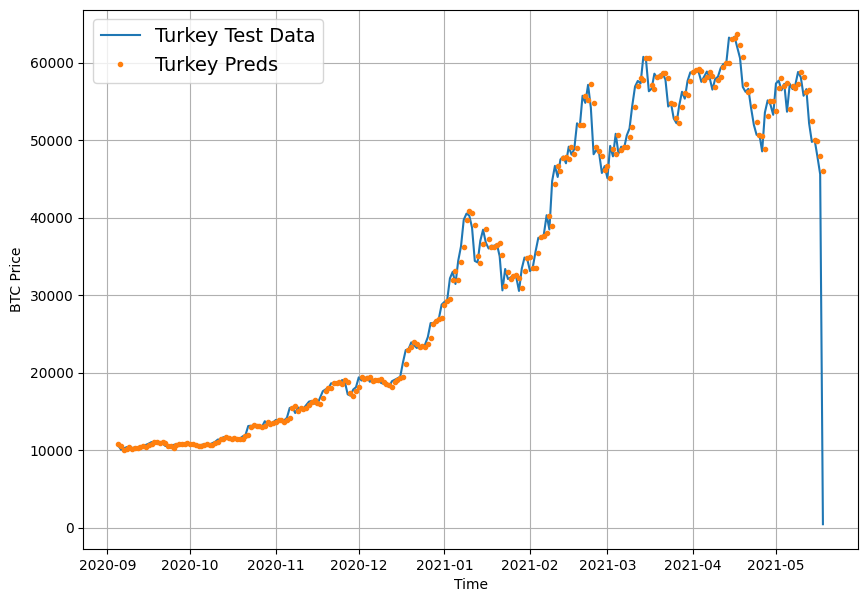

In [144]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

In [146]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              # "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,564.653687,1.159703e+06,1076.895142,2.523250,0.991940
model_2_dense_w30_h1,616.502136,1.301179e+06,1140.692383,2.786963,1.077652
model_3_dense_w30_h7,1241.973755,5.524432e+06,1426.869751,5.485606,2.210023
model_4_CONV1D,567.775330,1.174085e+06,1083.552124,2.541324,0.997424
model_5_LSTM,595.010803,1.267155e+06,1125.679810,2.683295,1.045269
model_6_multivariate,563.787109,1.157674e+06,1075.952637,2.545097,0.990418
model_9_ensemble,568.325439,1.146962e+06,1070.963135,2.576279,0.998390
model_10_turkey,17136.681641,6.148755e+08,23726.541016,121.464325,26.519075


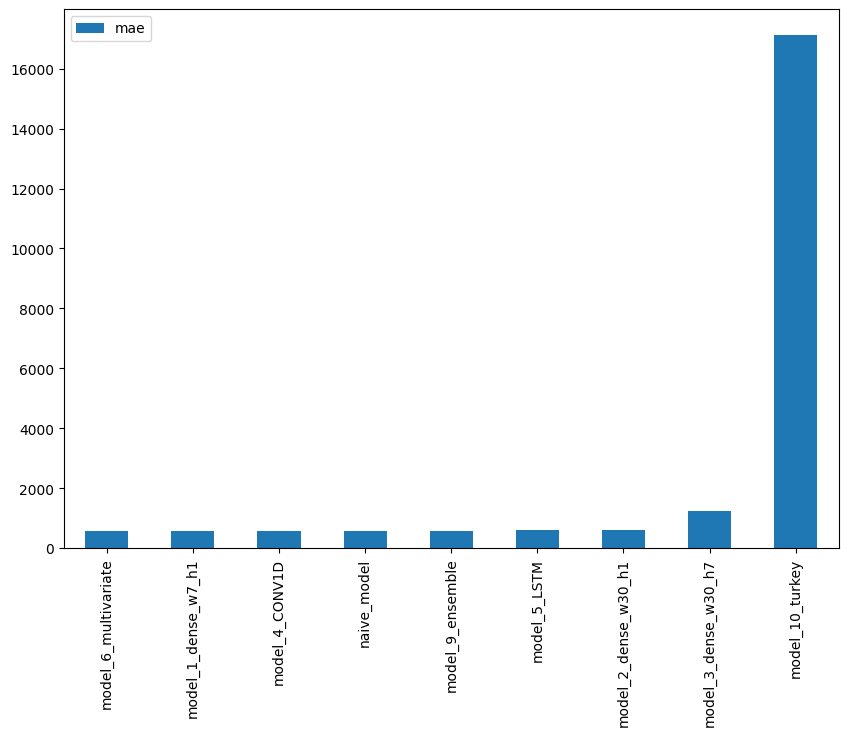

In [147]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");